<a href="https://colab.research.google.com/github/LingPeiYu/AaltoThesisDataAnalysis/blob/main/AaltoThesisDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression Analysis

In [29]:
#Polynomial Regression Analysis
%config Completer.use_jedi = False # enable code auto-completion
import numpy as np #import numpy to work with arrays
import pandas as pd #import pandas to manipulate the dataset
from matplotlib import pyplot as plt #import the module matplotlib.pyplot to do visulization
from sklearn.preprocessing import PolynomialFeatures,normalize,MinMaxScaler # function to generate polynomial and interaction features
from sklearn.linear_model import LinearRegression,LogisticRegression,HuberRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score # function to calculate mean squared error
from sklearn.model_selection import train_test_split

##Process Data

In [30]:
data=[]
data.append(pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-13-14-56-46.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-15-16-17-13.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-17-16-22-19.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))

#data process
AIStDecimalScaler = 10**2
AttScaler = MinMaxScaler()
SuccStDecimalScaler = 10**2
PDiffScaler = MinMaxScaler()
ChessDecimalScaler=10
for i in range(0,len(data)):
  data[i]['FailureCount']=data[i]['FailureCount']+1
  data[i]=data[i].rename(columns={'FailureCount': 'Attempt'})
  data[i]['AIBestStep']=data[i][['AIBestStep']]/AIStDecimalScaler
  data[i]['Attempt']=AttScaler.fit_transform(data[i][['Attempt']])
  data[i]['SuccessStep']=data[i][['SuccessStep']]/SuccStDecimalScaler
  data[i]['PercivedDifficulty']=PDiffScaler.fit_transform(data[i][['PercivedDifficulty']])

TestData=data[0]
for i in range(1,len(data)):
  TestData=pd.concat([TestData,data[i]],axis=0)

TestData=TestData.assign(KingCount=TestData['ChessGroup']//100000)
TestData=TestData.assign(QueenCount=TestData['ChessGroup']%100000//10000)
TestData=TestData.assign(RookCount=TestData['ChessGroup']%10000//1000)
TestData=TestData.assign(BishopCount=TestData['ChessGroup']%1000//100)
TestData=TestData.assign(KnightCount=TestData['ChessGroup']%100//10)
TestData=TestData.assign(PawnCount=TestData['ChessGroup']%10//1)

TestData['KingCount']=TestData['KingCount']/ChessDecimalScaler
TestData['QueenCount']=TestData['QueenCount']/ChessDecimalScaler
TestData['RookCount']=TestData['RookCount']/ChessDecimalScaler
TestData['BishopCount']=TestData['BishopCount']/ChessDecimalScaler
TestData['KnightCount']=TestData['KnightCount']/ChessDecimalScaler
TestData['PawnCount']=TestData['PawnCount']/ChessDecimalScaler

<ipython-input-30-d37b0e668316>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-30-d37b0e668316>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-30-d37b0e668316>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-4-13-14-56-46.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-30-d37b0e668316>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future ver

In [31]:
TestData=TestData[['TestIndex', 'LevelIndex', 'Width', 'Length', 
       'KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount',
       'DataPieceCount', 'TargetStep', 'StepRange(+-)', 'AIBestStep',
       'Attempt', 'SuccessStep', 'PercivedDifficulty']]
#print(TestData)

In [32]:
lvIndexs=TestData[['LevelIndex']]
lvIndexs=np.unique(lvIndexs.to_numpy())

lv_train, lv_rem, lv_train, lv_rem = train_test_split(lvIndexs,lvIndexs,test_size=0.5,random_state=42)
lv_val, lv_test, lv_val, lv_test = train_test_split(lv_rem,lv_rem,test_size=0.2,random_state=42)

data_train=TestData[TestData['LevelIndex'].isin(lv_train.ravel())]
data_val=TestData[TestData['LevelIndex'].isin(lv_val.ravel())]
data_test=TestData[TestData['LevelIndex'].isin(lv_test.ravel())]

print(TestData)

    TestIndex  LevelIndex  Width  Length  KingCount  QueenCount  RookCount  \
0           0           2     10      10        0.0         0.1        0.0   
1           1          14     10      10        0.0         0.0        0.1   
2           2           9     10      10        0.0         0.0        0.0   
3           3          16     10      10        0.0         0.0        0.2   
4           4          18     10      10        0.0         0.0        0.2   
..        ...         ...    ...     ...        ...         ...        ...   
15         15           6     10      10        0.0         0.0        0.0   
16         16          13     10      10        0.0         0.0        0.1   
17         17           2     10      10        0.0         0.1        0.0   
18         18           7     10      10        0.0         0.0        0.0   
19         19          11     10      10        0.0         0.0        0.0   

    BishopCount  KnightCount  PawnCount  DataPieceCount  Target

##Predict Precived Difficulty

In [33]:
#Get X
X_train=data_train[['AIBestStep', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()
X_val=data_val[['AIBestStep', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()
X_test=data_test[['AIBestStep', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()

#Get Y
y_train=data_train[['PercivedDifficulty']].to_numpy()
y_val=data_val[['PercivedDifficulty']].to_numpy()
y_test=data_test[['PercivedDifficulty']].to_numpy()

tr_errors = []
val_errors = []
#Polynomial Regression
plt.figure(figsize=(8, 20))
for degree in range(1,9):
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  regr=LinearRegression(fit_intercept=False)
  regr.fit(X_train_poly,y_train)
  y_pred_train = regr.predict(X_train_poly)
  tr_error = mean_squared_error(y_train, y_pred_train)
  X_val_poly = poly.fit_transform(X_val)
  y_pred_val = regr.predict(X_val_poly)
  val_error = mean_squared_error(y_val, y_pred_val)
  tr_errors.append(tr_error)
  val_errors.append(val_error)

print(tr_errors)
print(val_errors)

[0.04191425693475901, 0.04076844372820825, 0.033066666666666716, 0.03306666666666667, 0.03306666666666666, 0.033066666666666716, 0.03306666666666663, 0.03306666666666666]
[0.04812083780456529, 0.7005170156137824, 2.67661184302261, 1.5891646104850499, 1.2373885590835627, 1.121079042635473, 1.0849629327125534, 1.0749831923801771]


<Figure size 800x2000 with 0 Axes>

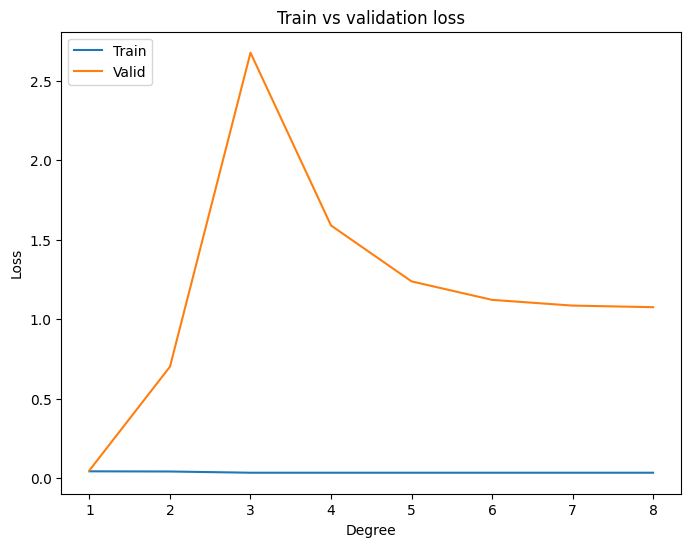

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,9), tr_errors, label = 'Train')
plt.plot(range(1,9), val_errors,label = 'Valid')
plt.legend(loc = 'upper left')
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [35]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
regrPreDiff=LinearRegression(fit_intercept=False)
regrPreDiff.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test)
y_pred_test = regrPreDiff.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)
print(test_error)

0.05656306874879654


In [36]:
weight = pd.DataFrame(regrPreDiff.coef_, columns=['AIBestStep', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount','c'])
print(weight)

   AIBestStep  QueenCount  RookCount  BishopCount  KnightCount  PawnCount  \
0   -0.475505    1.926081   4.692969     2.363421     2.145332   1.459288   

          c  
0 -0.774572  


##Predict Attempt

[0.02700661575959014, 0.025401180085612575, 0.020075073961322142, 0.020075073961322142, 0.020075073961322142, 0.020075073961322142, 0.020075073961322142, 0.02007507396132215]
[0.08159574773459499, 0.9081234806921821, 1.2353228769699656, 0.607465462423857, 0.4208887310680981, 0.36364406520801207, 0.3467323614663146, 0.3422193773353017]


<Figure size 800x2000 with 0 Axes>

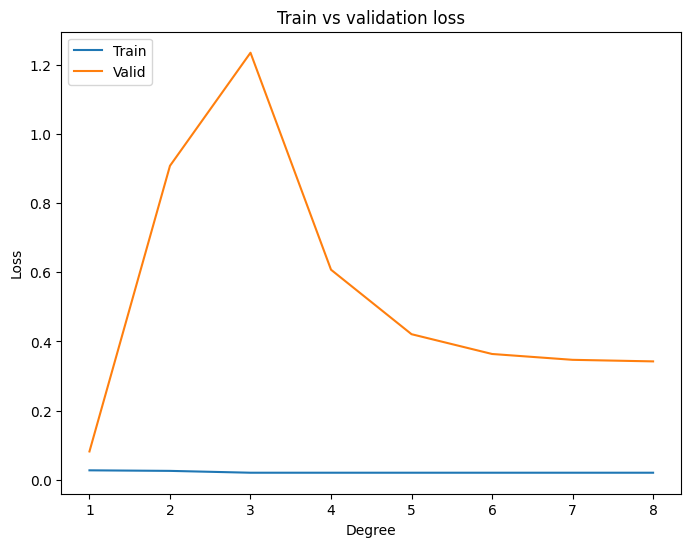

In [37]:
#Get Y
y_train=data_train[['Attempt']].to_numpy()
y_val=data_val[['Attempt']].to_numpy()
y_test=data_test[['Attempt']].to_numpy()

tr_errors = []
val_errors = []
#Polynomial Regression
plt.figure(figsize=(8, 20))
for degree in range(1,9):
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  regr=LinearRegression(fit_intercept=False)
  regr.fit(X_train_poly,y_train)
  y_pred_train = regr.predict(X_train_poly)
  tr_error = mean_squared_error(y_train, y_pred_train)
  X_val_poly = poly.fit_transform(X_val)
  y_pred_val = regr.predict(X_val_poly)
  val_error = mean_squared_error(y_val, y_pred_val)
  tr_errors.append(tr_error)
  val_errors.append(val_error)

print(tr_errors)
print(val_errors)

plt.figure(figsize=(8, 6))
plt.plot(range(1,9), tr_errors, label = 'Train')
plt.plot(range(1,9), val_errors,label = 'Valid')
plt.legend(loc = 'upper left')
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [38]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
regrAtt=LinearRegression(fit_intercept=False)
regrAtt.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test)
y_pred_test = regrAtt.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)
print(test_error)

0.0330906813475977


In [39]:
weight = pd.DataFrame(regrAtt.coef_, columns=['AIBestStep', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount','c'])
print(weight)

   AIBestStep  QueenCount  RookCount  BishopCount  KnightCount  PawnCount  \
0   -0.310004    1.256548   1.935953     0.493938     0.976721   0.845495   

          c  
0 -0.553602  


# Correlation Analysis

In [40]:
#Corr Analysis
import seaborn as sns

##Process Data

In [41]:
scaler=MinMaxScaler()

In [42]:
data=[]
data.append(pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-13-14-56-46.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-15-16-17-13.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-17-16-22-19.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
#sort each test's values by level index
#extract player's specific data
playerData=[]
for i in range(0,len(data)):
  data[i]['FailureCount']=data[i]['FailureCount']+1
  data[i]=data[i].rename(columns={'FailureCount': 'Attempt'})
  p='Player'+str(i)
  playerData.append(
      data[i].rename(columns={'Attempt': p+'Attempt'}).rename(columns={'SuccessStep': p+'SuccessStep'}).rename(columns={'PercivedDifficulty': p+'PercivedDifficulty'})
      [['LevelIndex',p+'Attempt',p+'SuccessStep',p+'PercivedDifficulty']]
      )
  playerData[i]=playerData[i].sort_values(by='LevelIndex',ascending=True)

#sort level data
LevelData=data[0].drop_duplicates(subset='LevelIndex').sort_values(by='LevelIndex',ascending=True)

LevelData=LevelData.assign(KingCount=LevelData['ChessGroup']//100000)
LevelData=LevelData.assign(QueenCount=LevelData['ChessGroup']%100000//10000)
LevelData=LevelData.assign(RookCount=LevelData['ChessGroup']%10000//1000)
LevelData=LevelData.assign(BishopCount=LevelData['ChessGroup']%1000//100)
LevelData=LevelData.assign(KnightCount=LevelData['ChessGroup']%100//10)
LevelData=LevelData.assign(PawnCount=LevelData['ChessGroup']%10//1)
print(LevelData)

    TestIndex  LevelIndex  Width  Length  ChessGroup  DataPieceCount  \
12         12           0     10      10       10023              10   
16         16           1     10      10       10023              10   
0           0           2     10      10       10023              10   
17         17           3     10      10       10023              10   
10         10           4     10      10         404              10   
9           9           5     10      10         404              10   
5           5           6     10      10         404              10   
7           7           7     10      10         404              10   
18         18           8     10      10          12              10   
2           2           9     10      10          12              10   
15         15          10     10      10          12              10   
19         19          11     10      10          12              10   
8           8          12     10      10        1102            

<ipython-input-42-f2b9b9dee9de>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-42-f2b9b9dee9de>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-42-f2b9b9dee9de>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-4-13-14-56-46.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-42-f2b9b9dee9de>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future ver

##AIBestStep vs SuccessStep

    AIBestStep  Player0SuccessStep  Player1SuccessStep  Player2SuccessStep  \
0     0.000000            0.064516            0.000000            0.046512   
1     0.269231            0.225806            0.977778            0.255814   
2     0.807692            0.451613            0.755556            0.232558   
3     0.692308            0.645161            0.355556            0.465116   
4     0.115385            0.000000            0.133333            0.000000   
5     0.615385            0.774194            1.000000            0.348837   
6     0.576923            0.741935            0.422222            0.348837   
7     0.615385            1.000000            0.577778            0.604651   
8     0.153846            0.193548            0.044444            0.093023   
9     0.538462            0.354839            0.577778            0.325581   
10    0.615385            0.451613            0.444444            0.325581   
11    1.000000            0.483871            0.288889          

<Axes: >

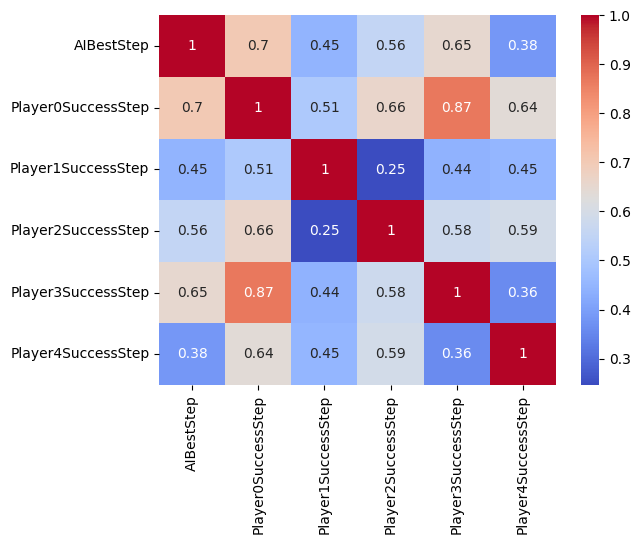

In [43]:
CorData=LevelData[['LevelIndex','AIBestStep']]
for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'SuccessStep']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

for i in range(0,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

##AIBestStep vs PercivedDifficulty

    AIBestStep  Player0PercivedDifficulty  Player1PercivedDifficulty  \
0           15                          3                          2   
1           22                          4                          3   
2           36                          7                          6   
3           33                          7                          5   
4           18                          2                          4   
5           31                          7                          6   
6           30                          6                          3   
7           31                          7                          5   
8           19                          1                          1   
9           29                          1                          2   
10          31                          1                          2   
11          41                          2                          2   
12          19                          1                       

<Axes: >

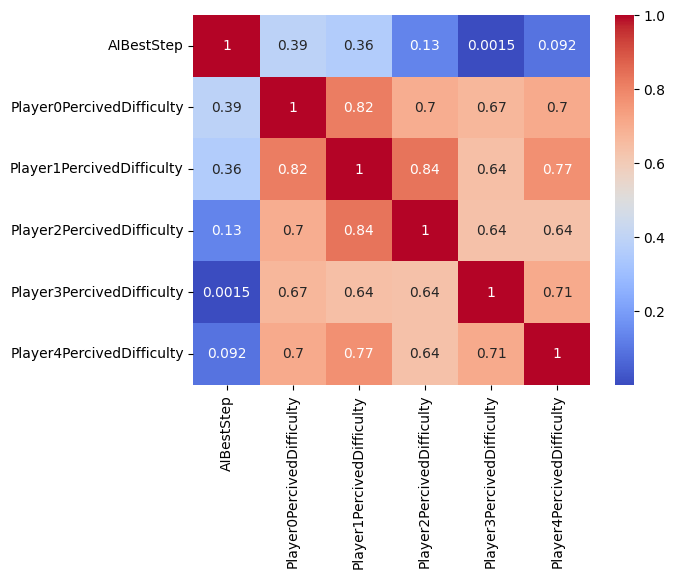

In [44]:
CorData=LevelData[['LevelIndex','AIBestStep']]
for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'PercivedDifficulty']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

print(CorData)

for i in range(0,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

##AIBestStep vs PercivedDifficulty (average correlation in different chess pieces combination)

    AIBestStep  Player0PercivedDifficulty  Player1PercivedDifficulty  \
0           15                          3                          2   
1           22                          4                          3   
2           36                          7                          6   
3           33                          7                          5   
4           18                          2                          4   
5           31                          7                          6   
6           30                          6                          3   
7           31                          7                          5   
8           19                          1                          1   
9           29                          1                          2   
10          31                          1                          2   
11          41                          2                          2   
12          19                          1                       

<Axes: >

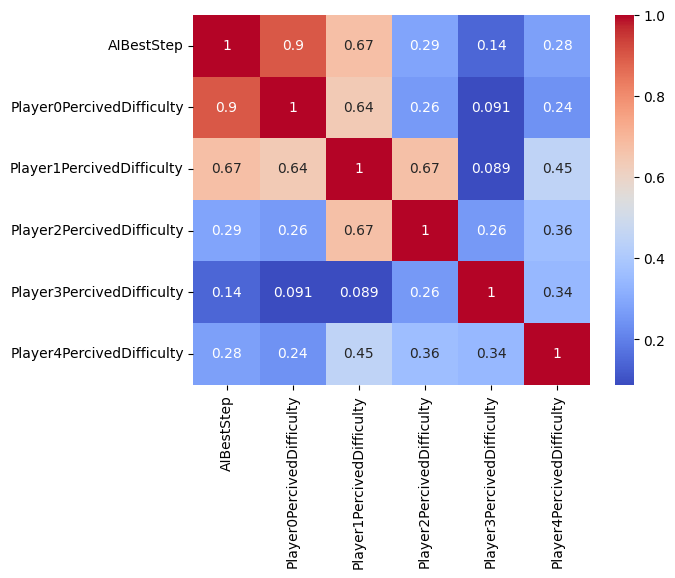

In [45]:
from numpy.ma.core import equal
CorData=LevelData[['LevelIndex','AIBestStep']]
for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'PercivedDifficulty']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

print(CorData)

for i in range(0,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

for i in [0,4,8,12,16]:
  SubCorData=CorData.iloc[i:i+4]
  sub_corr_matrix=SubCorData.corr()
  sub_corr_matrix.fillna(0, inplace=True)
  np.fill_diagonal(sub_corr_matrix.values, 1) 

  if i == 0:
    corr_matrix = sub_corr_matrix
  else:
    corr_matrix = corr_matrix+sub_corr_matrix
  #print(SubCorData)

corr_matrix=corr_matrix/5

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

##AIBestStep vs Attempt

    AIBestStep  Player0Attempt  Player1Attempt  Player2Attempt  \
0           15              10               1               1   
1           22              12               2               1   
2           36              11               4               5   
3           33              26               9               1   
4           18               1               3               1   
5           31              47              15               2   
6           30              11               2               1   
7           31              31               5               4   
8           19               4               1               1   
9           29               1               1               2   
10          31               1               1               1   
11          41               1               1               1   
12          19               4               1               1   
13          26               1               1               2   
14        

<Axes: >

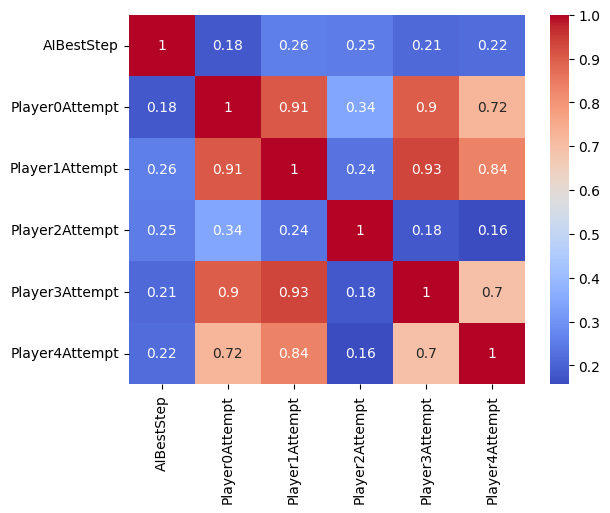

In [46]:
CorData=LevelData[['LevelIndex','AIBestStep']]
for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'Attempt']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

print(CorData)

for i in range(0,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

##Predicted Difficulty vs Percived Difficulty

<ipython-input-47-0f137ba54821>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['QueenCount']=X['QueenCount']/ChessDecimalScaler
<ipython-input-47-0f137ba54821>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RookCount']=X['RookCount']/ChessDecimalScaler
<ipython-input-47-0f137ba54821>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

    PredictedDifficulty  LevelIndex
0              0.342190           0
1              0.477015           1
2              0.746667           2
3              0.688884           3
4              0.419493           4
5              0.669884           5
6              0.650623           6
7              0.669884           7
8             -0.118536           8
9              0.074073           9
10             0.112594          10
11             0.305202          11
12             0.186411          12
13             0.321237          13
14             0.379019          14
15             0.610149          15
16             0.034045          16
17             0.207392          17
18             0.265174          18
19             0.400000          19
    PredictedDifficulty  Player0PercivedDifficulty  Player1PercivedDifficulty  \
0              0.342190                   0.333333                        0.2   
1              0.477015                   0.500000                        0.4   
2

<Axes: >

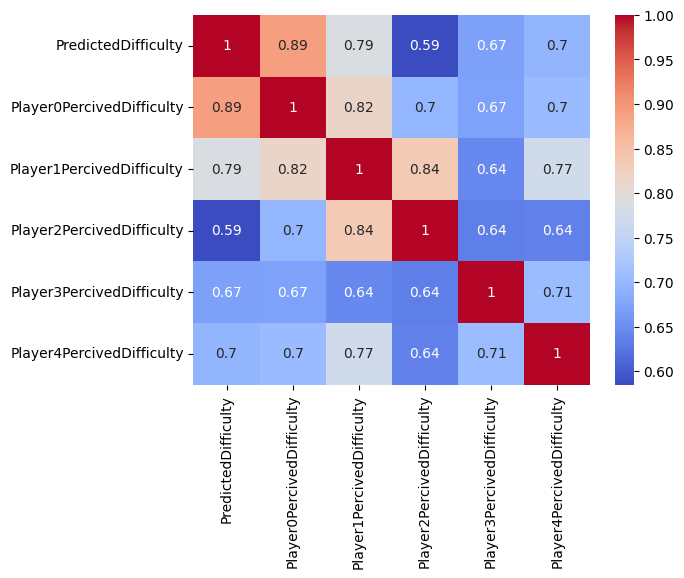

In [47]:
X=LevelData[['AIBestStep', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']]
X['QueenCount']=X['QueenCount']/ChessDecimalScaler
X['RookCount']=X['RookCount']/ChessDecimalScaler
X['BishopCount']=X['BishopCount']/ChessDecimalScaler
X['KnightCount']=X['KnightCount']/ChessDecimalScaler
X['PawnCount']=X['PawnCount']/ChessDecimalScaler
X[['AIBestStep']]=X[['AIBestStep']]/AIStDecimalScaler
X=X.to_numpy()
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)
y_pred = regrPreDiff.predict(X_poly)

CorData=pd.DataFrame(y_pred,columns=['PredictedDifficulty'])
CorData['LevelIndex']=range(0,LevelData.shape[0])
print(CorData)

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'PercivedDifficulty']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

for i in range(1,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

##Predicted Attempt vs Real Attempt

<ipython-input-48-41d9d12720e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['QueenCount']=X['QueenCount']/ChessDecimalScaler
<ipython-input-48-41d9d12720e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RookCount']=X['RookCount']/ChessDecimalScaler
<ipython-input-48-41d9d12720e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

    PredictedAttempt  LevelIndex
0           0.075092           0
1           0.163050           1
2           0.338967           2
3           0.301271           3
4           0.085422           4
5           0.248774           5
6           0.236208           6
7           0.248774           7
8          -0.097431           8
9           0.028224           9
10          0.053355          10
11          0.179010          11
12         -0.034914          12
13          0.053044          13
14          0.090740          14
15          0.241526          15
16         -0.206479          16
17         -0.093389          17
18         -0.055693          18
19          0.032265          19
    PredictedAttempt  Player0Attempt  Player1Attempt  Player2Attempt  \
0           0.075092        0.195652        0.000000            0.00   
1           0.163050        0.239130        0.071429            0.00   
2           0.338967        0.217391        0.214286            1.00   
3           0.30127

<Axes: >

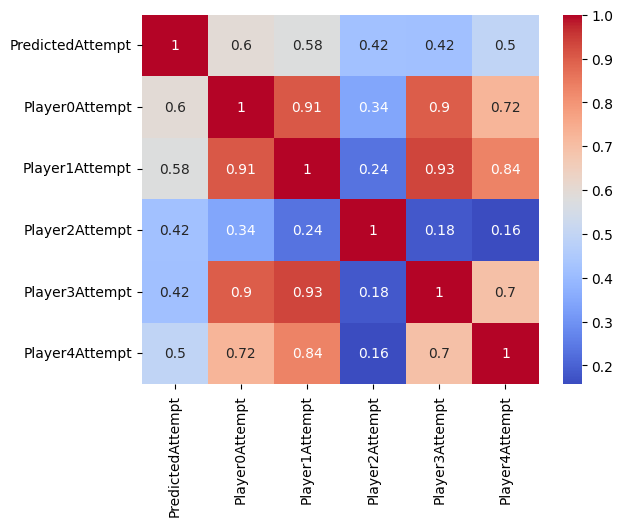

In [48]:
X=LevelData[['AIBestStep', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']]
X['QueenCount']=X['QueenCount']/ChessDecimalScaler
X['RookCount']=X['RookCount']/ChessDecimalScaler
X['BishopCount']=X['BishopCount']/ChessDecimalScaler
X['KnightCount']=X['KnightCount']/ChessDecimalScaler
X['PawnCount']=X['PawnCount']/ChessDecimalScaler
X[['AIBestStep']]=X[['AIBestStep']]/AIStDecimalScaler
X=X.to_numpy()
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)
y_pred = regrAtt.predict(X_poly)

CorData=pd.DataFrame(y_pred,columns=['PredictedAttempt'])
CorData['LevelIndex']=range(0,LevelData.shape[0])
print(CorData)

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'Attempt']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

for i in range(1,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Scatterplots

In [49]:
colors=['green','red','blue','pink','purple','lime']

##Process Data

In [50]:
data=[]
data.append(pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-13-14-56-46.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-15-16-17-13.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-17-16-22-19.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
#sort each test's values by level index
#extract player's specific data
playerData=[]
for i in range(0,len(data)):
  data[i]['FailureCount']=data[i]['FailureCount']+1
  data[i]=data[i].rename(columns={'FailureCount': 'Attempt'})
  p='Player'+str(i)
  playerData.append(
      data[i].rename(columns={'Attempt': p+'Attempt'}).rename(columns={'SuccessStep': p+'SuccessStep'}).rename(columns={'PercivedDifficulty': p+'PercivedDifficulty'})
      [['LevelIndex',p+'Attempt',p+'SuccessStep',p+'PercivedDifficulty']]
      )
  playerData[i]=playerData[i].sort_values(by='LevelIndex',ascending=True)

#sort level data
LevelData=data[0].drop_duplicates(subset='LevelIndex').sort_values(by='LevelIndex',ascending=True)

LevelData=LevelData.assign(KingCount=LevelData['ChessGroup']//100000)
LevelData=LevelData.assign(QueenCount=LevelData['ChessGroup']%100000//10000)
LevelData=LevelData.assign(RookCount=LevelData['ChessGroup']%10000//1000)
LevelData=LevelData.assign(BishopCount=LevelData['ChessGroup']%1000//100)
LevelData=LevelData.assign(KnightCount=LevelData['ChessGroup']%100//10)
LevelData=LevelData.assign(PawnCount=LevelData['ChessGroup']%10//1)

scaler=MinMaxScaler()

<ipython-input-50-544207aaceb8>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-50-544207aaceb8>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-50-544207aaceb8>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-4-13-14-56-46.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-50-544207aaceb8>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future ver

##Plots

<ipython-input-51-59dab36bdde5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['QueenCount']=X['QueenCount']/ChessDecimalScaler
<ipython-input-51-59dab36bdde5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RookCount']=X['RookCount']/ChessDecimalScaler
<ipython-input-51-59dab36bdde5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

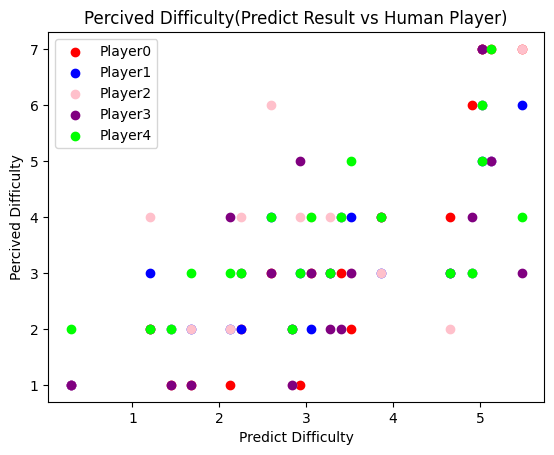

In [51]:
X=LevelData[['AIBestStep', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']]
X['QueenCount']=X['QueenCount']/ChessDecimalScaler
X['RookCount']=X['RookCount']/ChessDecimalScaler
X['BishopCount']=X['BishopCount']/ChessDecimalScaler
X['KnightCount']=X['KnightCount']/ChessDecimalScaler
X['PawnCount']=X['PawnCount']/ChessDecimalScaler
X[['AIBestStep']]=X[['AIBestStep']]/AIStDecimalScaler
X=X.to_numpy()
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)
y_pred = regrPreDiff.predict(X_poly)


PDiffScaler.fit_transform([[1],[7]])
y_pred=PDiffScaler.inverse_transform(y_pred)

#xAxis=LevelData['LevelIndex'].to_numpy()
#print(xAxis)

xAxis=y_pred

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  y=playerData[i][playerCode+'PercivedDifficulty'].to_numpy()
  plt.scatter(xAxis, y, c=colors[i+1], label=playerCode)

# 创建散点图
plt.locator_params(axis='x', integer=True)
plt.locator_params(axis='y', integer=True)
plt.xlabel('Predict Difficulty')  # 设置横轴标签
plt.ylabel('Percived Difficulty')  # 设置纵轴标签
plt.title('Percived Difficulty(Predict Result vs Human Player)')  # 设置图标题
plt.legend()  # 显示图例
plt.show()  # 显示图形

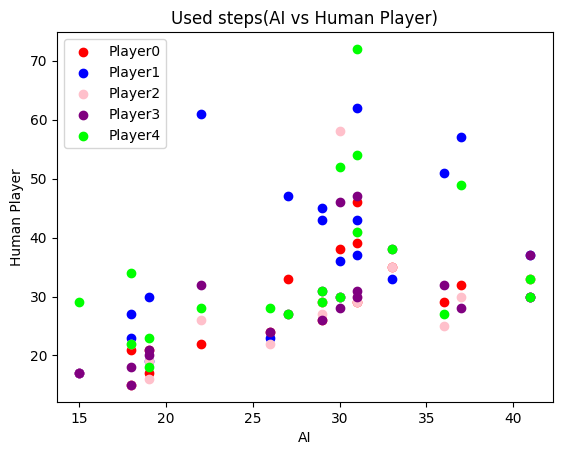

In [52]:
#xAxis=LevelData['LevelIndex'].to_numpy()
#print(xAxis)

xAxis=LevelData['AIBestStep'].to_numpy()

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  y=playerData[i][playerCode+'SuccessStep'].to_numpy()
  plt.scatter(xAxis, y, c=colors[i+1], label=playerCode)

# 创建散点图
plt.locator_params(axis='x', integer=True)
plt.locator_params(axis='y', integer=True)
plt.xlabel('AI')  # 设置横轴标签
plt.ylabel('Human Player')  # 设置纵轴标签
plt.title('Used steps(AI vs Human Player)')  # 设置图标题
plt.legend()  # 显示图例
plt.show()  # 显示图形

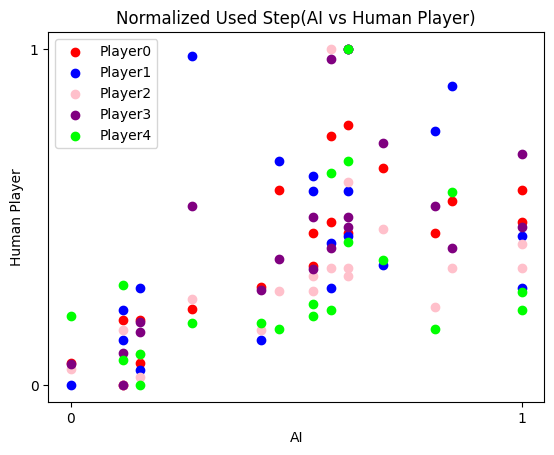

In [53]:
#xAxis=LevelData['LevelIndex'].to_numpy()
#print(xAxis)

xAxis=scaler.fit_transform(LevelData[['AIBestStep']])

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  y=scaler.fit_transform(playerData[i][[playerCode+'SuccessStep']])
  plt.scatter(xAxis, y, c=colors[i+1], label=playerCode)

# 创建散点图
plt.locator_params(axis='x', integer=True)
plt.locator_params(axis='y', integer=True)
plt.xlabel('AI')  # 设置横轴标签
plt.ylabel('Human Player')  # 设置纵轴标签
plt.title('Normalized Used Step(AI vs Human Player)')  # 设置图标题
plt.legend()  # 显示图例
plt.show()  # 显示图形

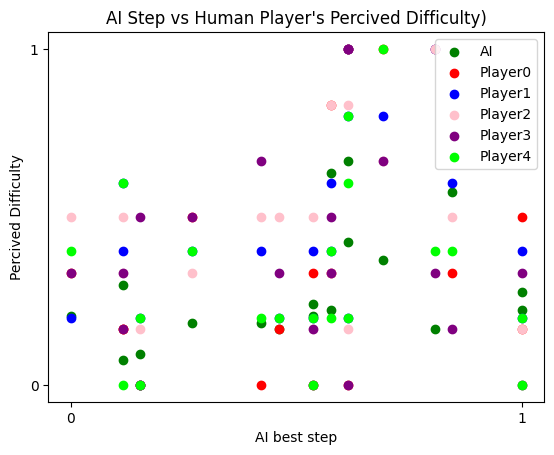

In [54]:
#xAxis=LevelData['LevelIndex'].to_numpy()
#print(xAxis)

xAxis=scaler.fit_transform(LevelData[['AIBestStep']])
plt.scatter(xAxis, y, c=colors[0], label='AI')  # 绘制第一组散点图，并设置颜色

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  y=PDiffScaler.fit_transform(playerData[i][[playerCode+'PercivedDifficulty']])
  plt.scatter(xAxis, y, c=colors[i+1], label=playerCode)

# 创建散点图
plt.locator_params(axis='x', integer=True)
plt.locator_params(axis='y', integer=True)
plt.xlabel('AI best step')  # 设置横轴标签
plt.ylabel('Percived Difficulty')  # 设置纵轴标签
plt.title('AI Step vs Human Player\'s Percived Difficulty)')  # 设置图标题
plt.legend()  # 显示图例
plt.show()  # 显示图形

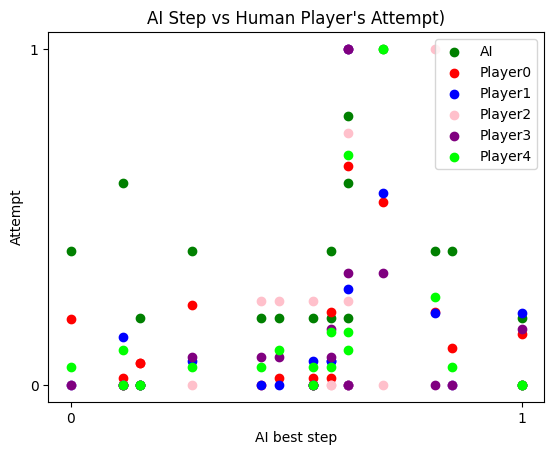

In [55]:
#xAxis=LevelData['LevelIndex'].to_numpy()
#print(xAxis)

xAxis=scaler.fit_transform(LevelData[['AIBestStep']])
plt.scatter(xAxis, y, c=colors[0], label='AI')  # 绘制第一组散点图，并设置颜色

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  y=scaler.fit_transform(playerData[i][[playerCode+'Attempt']])
  plt.scatter(xAxis, y, c=colors[i+1], label=playerCode)

# 创建散点图
plt.locator_params(axis='x', integer=True)
plt.locator_params(axis='y', integer=True)
plt.xlabel('AI best step')  # 设置横轴标签
plt.ylabel('Attempt')  # 设置纵轴标签
plt.title('AI Step vs Human Player\'s Attempt)')  # 设置图标题
plt.legend()  # 显示图例
plt.show()  # 显示图形

#Prediction

In [56]:
data=np.array([30,1,0,3,1,3])
data=data.reshape(-1,6)
X=pd.DataFrame(data,columns=['AIBestStep', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount'])
X['QueenCount']=X['QueenCount']/ChessDecimalScaler
X['RookCount']=X['RookCount']/ChessDecimalScaler
X['BishopCount']=X['BishopCount']/ChessDecimalScaler
X['KnightCount']=X['KnightCount']/ChessDecimalScaler
X['PawnCount']=X['PawnCount']/ChessDecimalScaler
X[['AIBestStep']]=X[['AIBestStep']]/AIStDecimalScaler
X=X.to_numpy()
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)
y_pred = regrPreDiff.predict(X_poly)


PDiffScaler.fit_transform([[1],[7]])
y_pred=PDiffScaler.inverse_transform(y_pred)

print(y_pred)

[[7.77263598]]
